# Лабораторна робота 1

**Мета:** отримати базові навики використання Python для дослідження та візуалізації даних.

## Номер варіанту


In [3]:
N = ord("M") % 3 + 1
print(N)

3


## Завдання 1 
### Функція

In [1]:
import csv
import numpy as np

def read_column_csv(filename, column_name):
    try:
        with open(filename, mode='r', newline='', encoding='utf-8') as file:
            csv_reader = csv.reader(file)
            header = next(csv_reader)  
            column_index = header.index(column_name)  
            column_data = []
            for row in csv_reader:
                column_data.append(row[column_index])
            return np.array(column_data, dtype=int)  
    except FileNotFoundError:
        print(f"Файл '{filename}' не знайдено.")
    except ValueError:
        print(f"Стовпець '{column_name}' не знайдено в файлі.")
    except Exception as e:
        print(f"Помилка: {e}")

np.set_printoptions()

## Завдання 2
### Масив NumPy зі значень стовпця «APC»

In [2]:
apc_column = read_column_csv('russia_losses_equipment.csv', 'APC')
print("Array")
print(apc_column)

Array
[ 516  706  706  816  846  862  900  939  945  985  999 1036 1070 1105
 1165 1205 1226 1249 1279 1375 1435 1448 1470 1487 1535 1556 1578 1597
 1625 1640 1664 1694 1710 1723 1735 1751 1776 1830 1844 1858 1861 1891
 1891 1895 1911 1923 1946 1964 1968 1976 1982 2002 2041 2063 2087 2118
 2162 2205 2238 2258 2308 2342 2389 2418 2445 2471 2519 2567 2610 2651
 2686 2713 2741 2764 2808 2856 2873 2900 2934 2958 2974 3009 3043 3063
 3090 3116 3141 3166 3194 3213 3235 3246 3258 3270 3282 3302 3343 3354
 3366 3379 3392 3400 3416 3429 3438 3450 3466 3484 3492 3503 3528 3545
 3563 3573 3577 3588 3606 3614 3632 3637 3645 3659 3687 3704 3720 3726
 3736 3737 3744 3744 3772 3789 3797 3811 3815 3823 3828 3829 3832 3832
 3866 3874 3879 3886 3892 3905 3912 3920 3929 3942 3950 3959 3971 3979
 3987 3995 4004 4011 4014 4022 4026 4032 4051 4055 4070 4076 4086 4100
 4108 4115 4126 4141 4152 4162 4179 4195 4212 4224 4230 4238 4243 4245
 4251 4254 4257 4269 4294 4312 4345 4366 4403 4430 4459 4484 4520 4557


## Завдання 3
### Добові втрати БТР

In [3]:
import csv
import numpy as np
data = read_column_csv('russia_losses_equipment.csv', 'APC')

def daily_losses(data):
    losses = np.diff(data)
    losses = np.insert(losses, 0, data[0])
    return losses

losses = daily_losses(data)
print("Daily BTR losses")
print(losses)

Daily BTR losses
[516 190   0 110  30  16  38  39   6  40  14  37  34  35  60  40  21  23
  30  96  60  13  22  17  48  21  22  19  28  15  24  30  16  13  12  16
  25  54  14  14   3  30   0   4  16  12  23  18   4   8   6  20  39  22
  24  31  44  43  33  20  50  34  47  29  27  26  48  48  43  41  35  27
  28  23  44  48  17  27  34  24  16  35  34  20  27  26  25  25  28  19
  22  11  12  12  12  20  41  11  12  13  13   8  16  13   9  12  16  18
   8  11  25  17  18  10   4  11  18   8  18   5   8  14  28  17  16   6
  10   1   7   0  28  17   8  14   4   8   5   1   3   0  34   8   5   7
   6  13   7   8   9  13   8   9  12   8   8   8   9   7   3   8   4   6
  19   4  15   6  10  14   8   7  11  15  11  10  17  16  17  12   6   8
   5   2   6   3   3  12  25  18  33  21  37  27  29  25  36  37  18   9
  33  23  22   3  17   8  11  17   2   4  24  28  20  11  25  25  24   8
  20  23  17  26  16  27  20  26  29  18  22  16  13  19 -14   5   7  14
  12  14  16  20   3   8  18  11  

## Завдання 4
### 5 найбільших добових втрат БТР

In [4]:
import csv
import numpy as np

data = read_column_csv('russia_losses_equipment.csv', 'APC')


def find_top_losses(losses):
    top_losses = np.argsort(losses)[-5:][::-1]
    return losses[top_losses]


top_losses = find_top_losses(losses)
print("Top 5 BTR losses")
print(top_losses)

Top 5 BTR losses
[516 190 120 110  96]


## Завдання 5
### Кількість БТР було знищено влітку 2023 року

In [6]:
import pandas as pd

def calculate(data_path, start_date_str, end_date_str):
    data = pd.read_csv(data_path)
    data['date'] = pd.to_datetime(data['date'])
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    summer_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    losses_start_date = summer_data[summer_data['date'] == start_date]['APC'].sum()
    losses_end_date = summer_data[summer_data['date'] == end_date]['APC'].sum()
    cumulative_difference = losses_end_date - losses_start_date
    return cumulative_difference

data_path = 'russia_losses_equipment.csv'
start_date_str = '2023-06-01'
end_date_str = '2023-08-31'

result = calculate(data_path, start_date_str, end_date_str)
print("How many btr were destroy on summer 2023")
print(result)

How many btr were destroy on summer 2023
1126


## Завдання 6
### Середнє значення знищених танків за останні 100 днів війни

In [7]:
import numpy as np
import pandas as pd 

filename = 'russia_losses_equipment.csv'
data = pd.read_csv(filename)

cumulative_losses = data['APC']

daily_losses = cumulative_losses.diff().fillna(cumulative_losses.iloc[0])

start_day = 100
end_day = 500

# Определите функцию average_losses
def average_losses(losses, start_day, end_day):
    losses_in_period = losses[start_day - 1:end_day]
    return np.mean(losses_in_period)

result = average_losses(daily_losses, start_day, end_day)
print("Average losses by 100-500 days")
print(result)

Average losses by 100-500 days
11.46633416458853


## Завдання 7
### Графік втрат танків за минулий рік

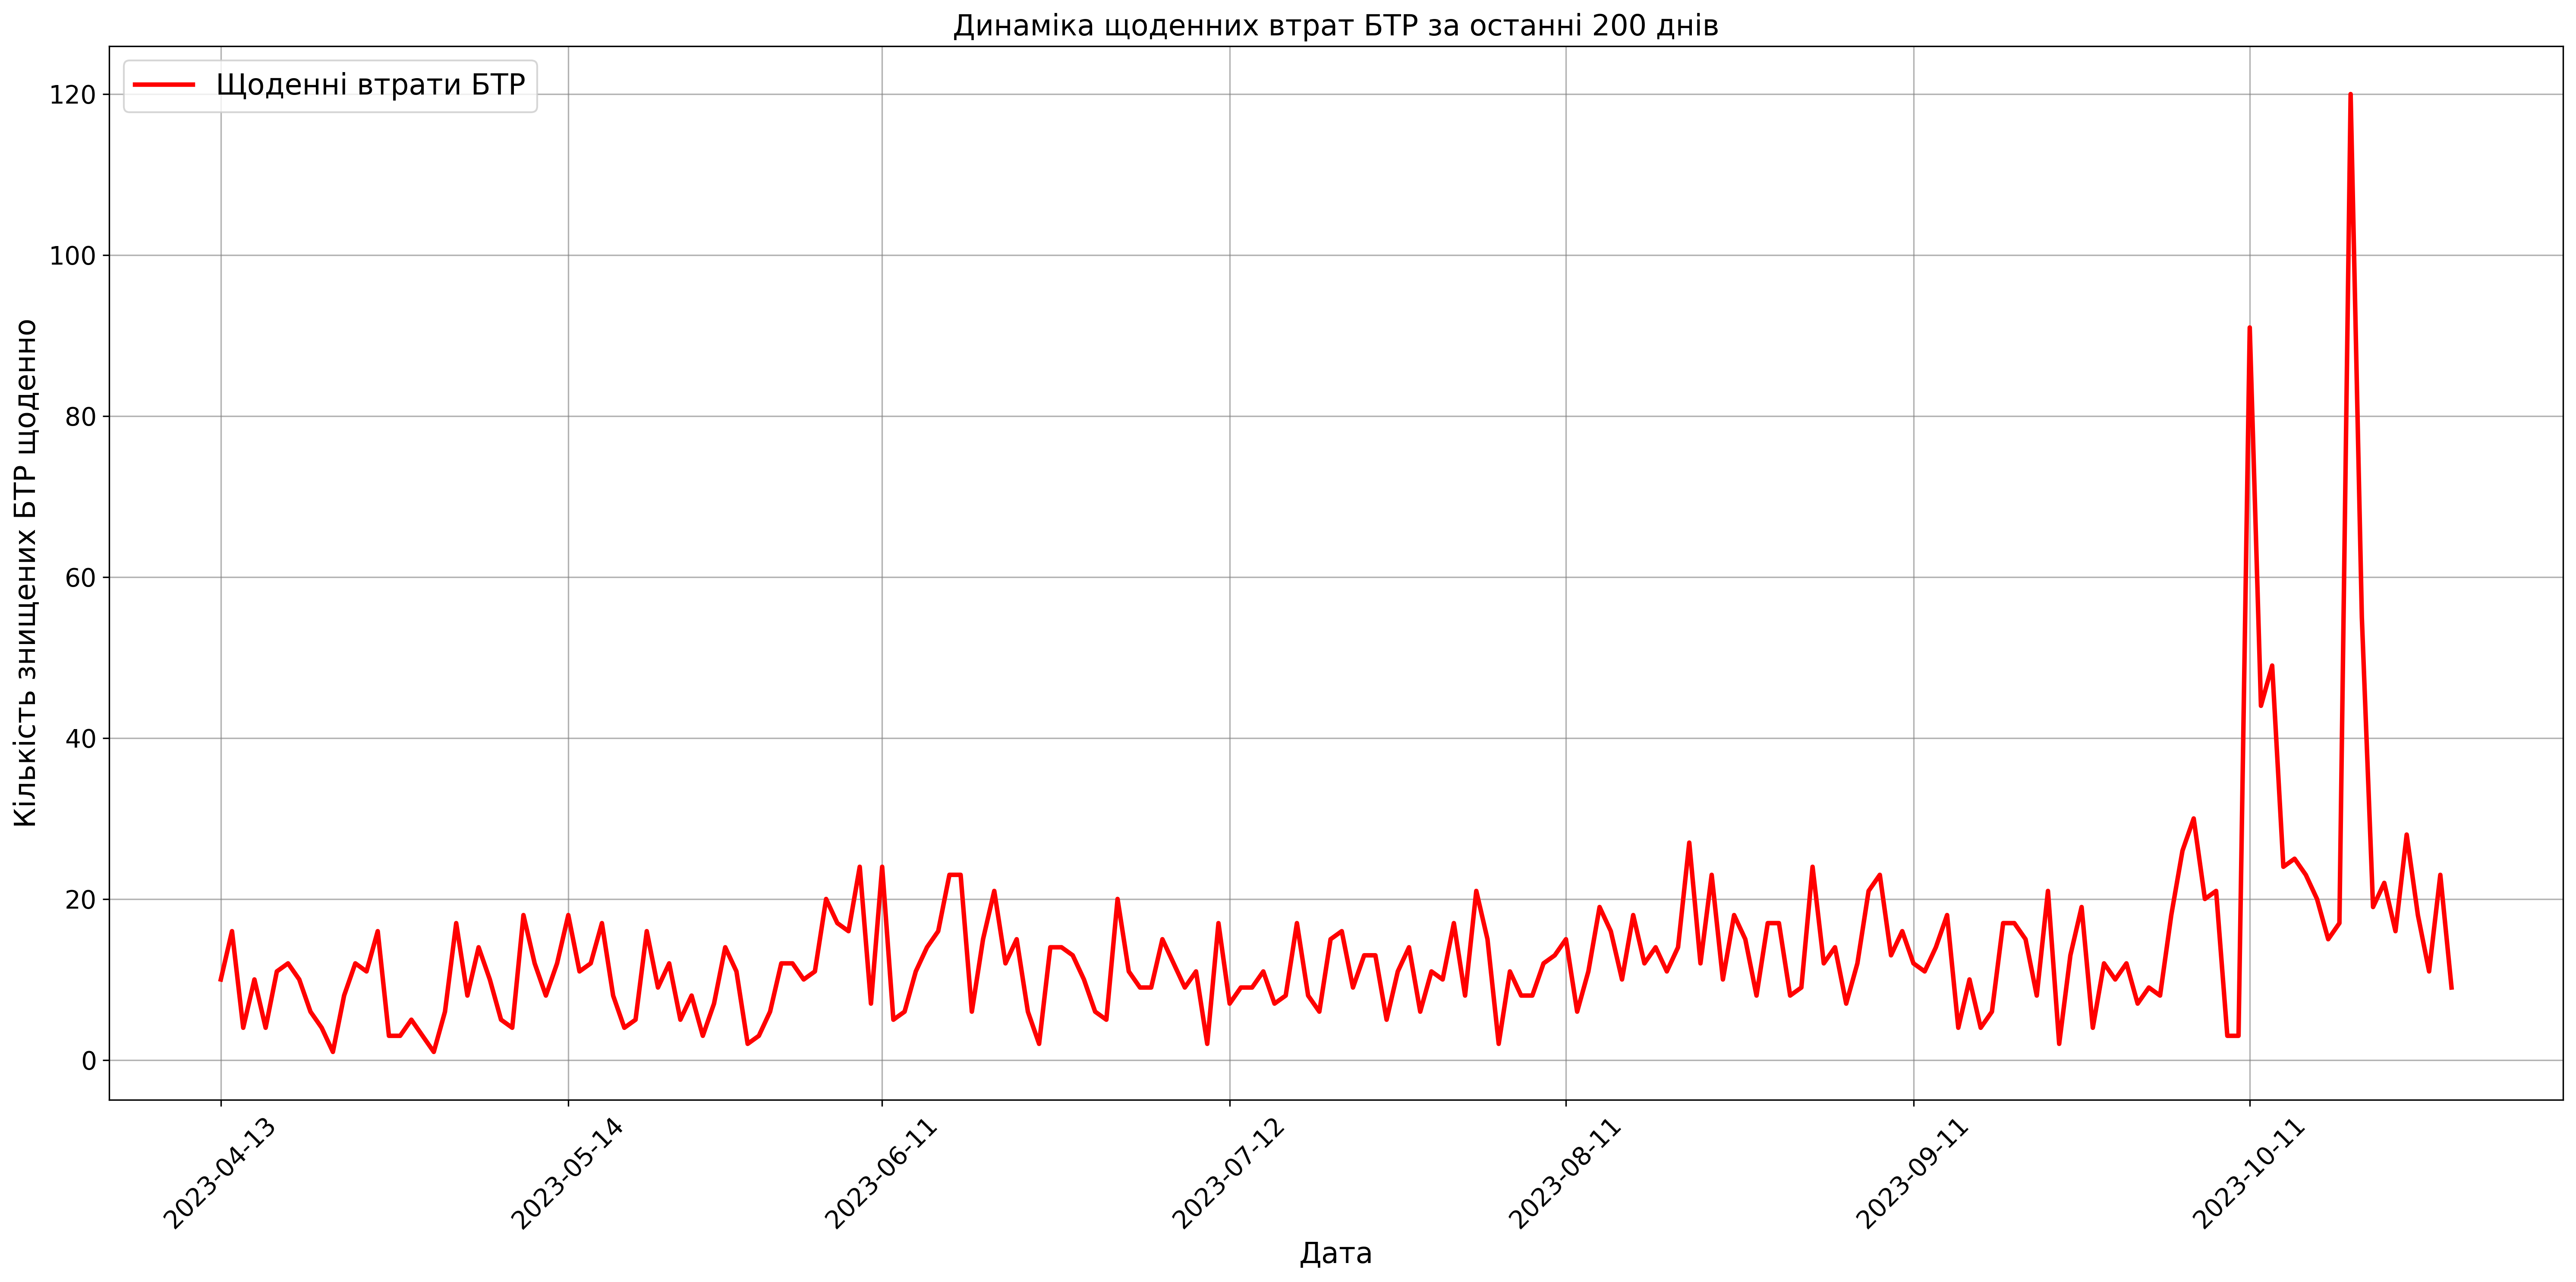

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator

filename = 'russia_losses_equipment.csv'
data = pd.read_csv(filename)

date_data = data['date']
cumulative_losses = data['APC']

daily_losses = cumulative_losses.diff().fillna(cumulative_losses.iloc[0])

def apc_losses():
    plt.figure(figsize=(20, 10), dpi=300)

    # Задайте стиль линии и цвет
    plt.plot(date_data[-200:], daily_losses[-200:], linestyle='solid', color='red', label='Щоденні втрати БТР', linewidth=2.5)

    plt.xlabel('Дата')
    plt.ylabel('Кількість знищених БТР щоденно')
    plt.title('Динаміка щоденних втрат БТР за останні 200 днів')

    plt.grid(True)

    plt.legend()

    ax = plt.gca()
    ax.xaxis.set_major_locator(MonthLocator())

    # Повернуть метки на оси X
    plt.xticks(rotation=45)

    # Настройка шрифтов и размеров шрифтов
    plt.xlabel('Дата', fontsize=16)
    plt.ylabel('Кількість знищених БТР щоденно', fontsize=16)
    plt.title('Динаміка щоденних втрат БТР за останні 200 днів', fontsize=16)
    plt.legend(fontsize=16)

    # Измените цвет и стиль сетки
    plt.grid(True, linestyle='solid', alpha=0.6, color='grey')

    # Установите размер меток по осям X и Y
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Изменить размер графика и сохранить его в файл
    plt.tight_layout()

    plt.savefig('losses.png', dpi=300) 

    plt.show()

apc_losses()

[GitHub](https://github.com/kolodakart/1python)